# Getting Environment Ready

## Installation

In [ ]:
%pip install chess
%pip install zstandard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.6 MB/s eta 0:00:00


## Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import chess
import chess.svg
import sys
import pickle
import matplotlib.pyplot as plt
import zstandard as zstd

# Filtering the Puzzles Dataset

## Loading the CSV File

In [ ]:
filename = '/content/drive/MyDrive/Chess_data/puzzles/lichess_db_puzzle.csv.zst'

In [ ]:
df = pd.read_csv(filename)

## Visualizing the Dataset

In [ ]:
display(df.head(5))

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1920,75,95,3955,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1359,74,96,22117,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN
2,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1124,75,86,543,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
3,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1556,81,89,81,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,NaN
4,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1458,74,93,482,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,NaN


In [ ]:
df['PuzzleId'].nunique()

3366499

<Axes: >

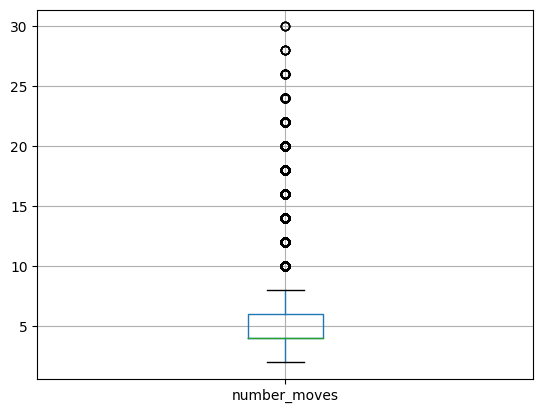

In [ ]:
def num_moves(x):
    num_moves = len(x.split())
    return num_moves
df['number_moves'] = df["Moves"].apply(num_moves)

df.boxplot(column=['number_moves'])

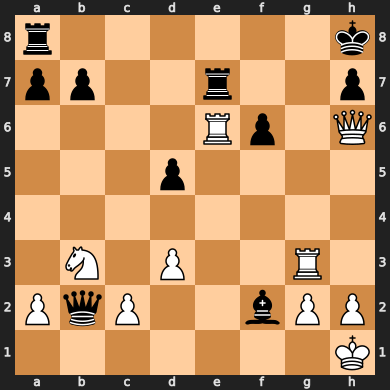

In [ ]:
first_fen = df['FEN'][0]
board = chess.Board(first_fen)
display(board)

<Axes: >

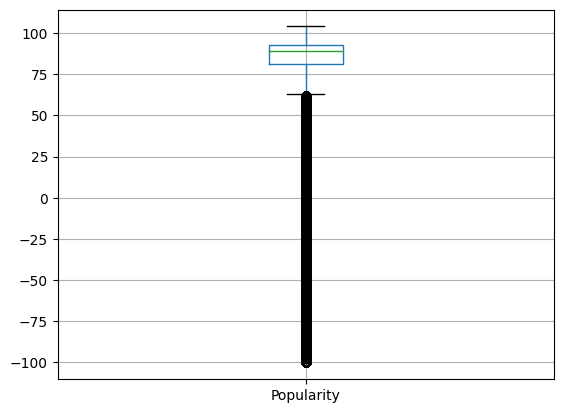

In [ ]:
df.boxplot(column=['Popularity'])

<Axes: >

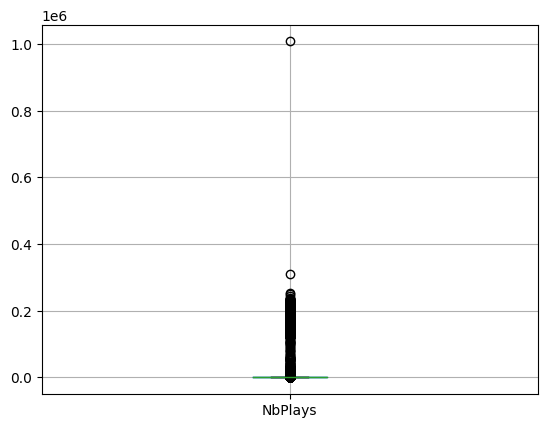

In [ ]:
df.boxplot(column=['NbPlays'])

In [ ]:
df.groupby(['Themes']).nunique()

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,GameUrl,OpeningTags,number_moves
Themes,,,,,,,,,,
advancedPawn advantage attackingF2F7 attraction bishopEndgame middlegame oneMove,1,1,1,1,1,1,1,1,1,1
advancedPawn advantage attackingF2F7 attraction deflection discoveredAttack endgame kingsideAttack pin promotion sacrifice veryLong,1,1,1,1,1,1,1,1,0,1
advancedPawn advantage attackingF2F7 attraction deflection doubleCheck long opening,1,1,1,1,1,1,1,1,1,1
advancedPawn advantage attackingF2F7 attraction deflection long middlegame,1,1,1,1,1,1,1,1,1,1
advancedPawn advantage attackingF2F7 attraction discoveredAttack long middlegame,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...
mate mateIn5 middlegame veryLong,90,90,90,88,20,20,88,90,10,4
mate mateIn5 opening veryLong,3,3,3,3,2,2,3,3,3,1
middlegame,1206,1206,1192,900,71,61,593,1206,218,7


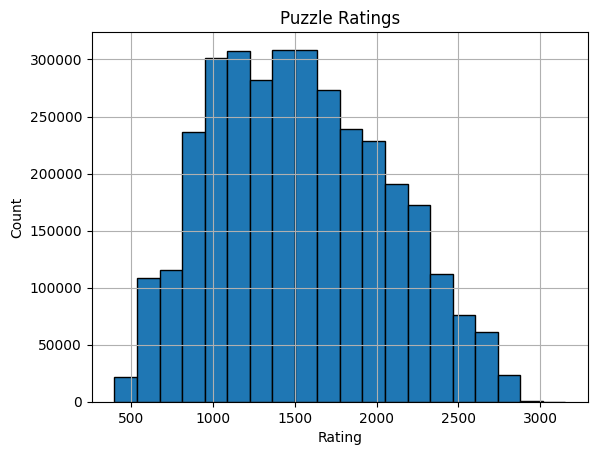

In [ ]:
plt.hist(df['Rating'], bins=20, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Puzzle Ratings')
plt.grid(True)
plt.show()

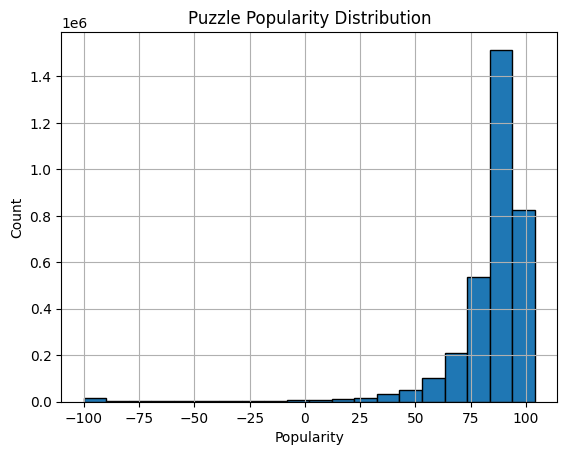

In [ ]:
plt.hist(df['Popularity'], bins=20, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Puzzle Popularity Distribution')
plt.grid(True)
plt.show()

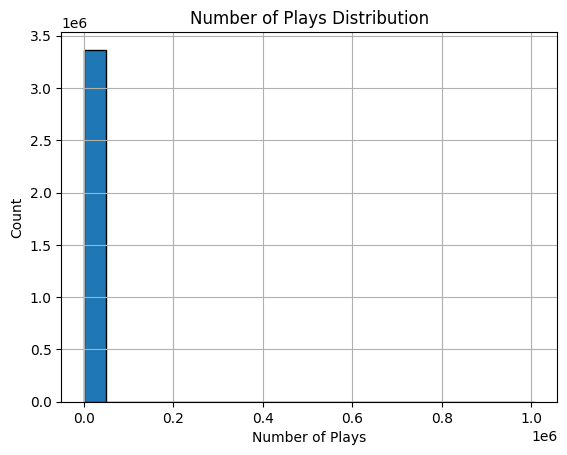

In [ ]:
plt.hist(df['NbPlays'], bins=20, edgecolor='black')
plt.xlabel('Number of Plays')
plt.ylabel('Count')
plt.title('Number of Plays Distribution')
plt.grid(True)
plt.show()

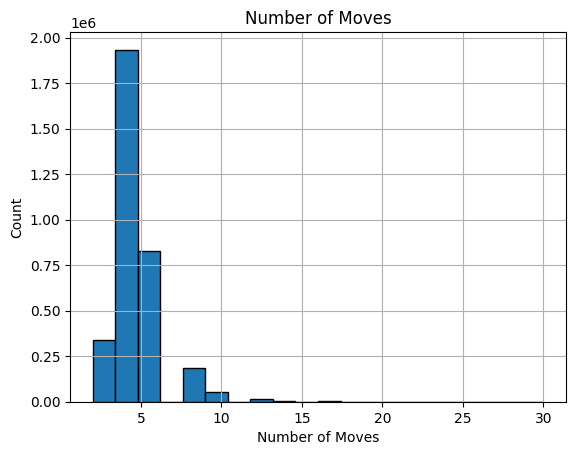

In [ ]:
plt.hist(df['number_moves'], bins=20, edgecolor='black')
plt.xlabel('Number of Moves')
plt.ylabel('Count')
plt.title('Number of Moves')
plt.grid(True)
plt.show()

## Filtering the Dataset

In [ ]:
# takes only puzzles that have less than 7 moves
df_nom_less7 = df[df['number_moves']< 7]

In [ ]:
# takes only puzzles that have rating more than 800 ELO and less than 1600 ELO
df_rate_8_16 = df_nom_less7[
    (df_nom_less7['Rating'] >= 800) & (df_nom_less7['Rating'] <= 1600)
]

In [ ]:
# takes only puzzles that have popularity more than 85
df_pop_85 = df_rate_8_16[
    df_rate_8_16['Popularity'] > 85
]

In [ ]:
# takes only puzzles that have been played more than 5000 times
df_nop_5e3 = df_pop_85[
    df_pop_85['NbPlays'] > 5e3
]

In [ ]:
print(len(df))
print(len(df_nom_less7))
print(len(df_rate_8_16))
print(len(df_pop_85))
print(len(df_nop_5e3))

3366499
3101959
1641605
1065944
139561


In [ ]:
nom = df_nop_5e3["number_moves"].sum()
nom -= len(df_nop_5e3)
print(nom)

495461


In [ ]:
df_filterd = df_nop_5e3

## Saving the Filtered Dataset

In [ ]:
filename_filtered = '/content/drive/MyDrive/Chess_data/puzzles/lichess_db_puzzle_filtered.csv.zst'

In [ ]:
df_filterd.to_csv(filename_filtered, index=False)

# Dataset Process

## Loading the Filtered Dataset

In [ ]:
df = pd.read_csv(filename_filtered)

## Define

In [ ]:
BOARD_SIZE = (8, 8, 6)
PIECE_TO_INDEX = {'P': 0, 'R': 1, 'N': 2, 'B': 3, 'Q': 4, 'K': 5}
CHESSY_TO_Y = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7}
INDEX_TO_PIECE = {0: 'P', 1: 'R', 2: 'N', 3: 'B', 4: 'Q', 5: 'K'}
Y_TO_CHESSY = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h'}
ARRAY_PIECE = ['P','R','Q','K','B','N']
BOOLEAN_PIECE = {'P': False, 'R': False, 'Q': False,
                 'K': False, 'B': False,'N': False}
PIECE_TO_WORD = {'P': 'Pawn', 'Q': 'Queen', 'K': 'King',
                 'N': 'Knight', 'R': 'Rook', 'B': 'Bishop'}

## Basic Functions

In [ ]:
def convert_bitboard_to_image(board):
    im2d = np.array(list(str(board).replace('\n', '').replace(' ', ''))).reshape((8, 8))
    im = np.zeros(BOARD_SIZE)

    for i in range(BOARD_SIZE[0]):
        for j in range(BOARD_SIZE[1]):
            piece = im2d[i, j]
            if piece == '.': continue
            if piece.isupper():
                im[i, j, PIECE_TO_INDEX[piece.upper()]] = 1
            else:
                im[i, j, PIECE_TO_INDEX[piece.upper()]] = -1

    return im


def convert_image_to_bitboard(im):
    board = chess.Board()
    board.clear()
    for i in range(BOARD_SIZE[0]):
        for j in range(BOARD_SIZE[1]):
            index_piece = np.where(im[(i, j)] != 0)
            index_piece = index_piece[0]
            new_coords = flatten_coord2d((7 - i, j))
            if index_piece.shape != (0,):
                piece = INDEX_TO_PIECE[index_piece[0]]
                if im[(i, j, index_piece[0])] == -1:
                    piece = piece.lower()
                board.set_piece_at(new_coords, chess.Piece.from_symbol(piece))

    return board

In [ ]:
def flatten_coord2d(coord2d):
    return (8 * coord2d[0]) + coord2d[1]

In [ ]:
def flip_image(im):
    return im[::-1, :, :]


def flip_color(im):
    indices_white = np.where(im == 1)
    indices_black = np.where(im == -1)
    im[indices_white] = -1
    im[indices_black] = 1
    return im


def flip_coord2d(coord2d):
    return 8 - coord2d[0] - 1, coord2d[1]

In [ ]:
def coord2d_to_chess_coord(coord2d):
    chess_coord = Y_TO_CHESSY[coord2d[1]] + str(8 - coord2d[0])
    return chess_coord


def chess_coord_to_coord2d(chess_coord):
    return 8 - int(chess_coord[1]), CHESSY_TO_Y[chess_coord[0]]

In [ ]:
def clip_pieces(prob_dists, ims):
    mask = ims > 0
    rotated_mask = np.rollaxis(mask, 3, 1)  # Convert to form (num_samples, C, H, W)

    or_channels = np.any(rotated_mask, axis=1)
    filter = or_channels.reshape(or_channels.shape[0], 64)

    prob_dists_filtered = prob_dists * filter
    return prob_dists_filtered


def clip_move(prob_dist, im, coord):
    board = convert_image_to_bitboard(im)

    piece_coord = coord2d_to_chess_coord(coord)
    for i in range(BOARD_SIZE[0]):
        for j in range(BOARD_SIZE[1]):
            to_coord = coord2d_to_chess_coord((i, j))
            if piece_coord == to_coord:
                prob_dist[i * 8 + j] = 0
                continue
            uci_move = piece_coord + to_coord
            if chess.Move.from_uci(uci_move) not in board.legal_moves:
                prob_dist[i * 8 + j] = 0

    return prob_dist

## Process + Save


In [ ]:
NUM_PUZZLES = len(df)

In [ ]:
for piece in range(len(ARRAY_PIECE) + 1):
    if piece > 0:
      if piece > 1:
          BOOLEAN_PIECE[ARRAY_PIECE[piece - 2]] = False
      BOOLEAN_PIECE[ARRAY_PIECE[piece - 1]] = True
      print(PIECE_TO_WORD[ARRAY_PIECE[piece - 1]])
    else:
       print('Base')

    X_train, y_train = [], []
    first_model_data = not any(BOOLEAN_PIECE.values())

    step_size = int(NUM_PUZZLES * 0.1)

    for index, puzzle in df.iterrows():
        if (index + 1) % step_size == 0:
            print("Processed %d games out of %d" % (index, NUM_PUZZLES))

        board = chess.Board()
        board.set_fen(puzzle['FEN'])
        moves = puzzle['Moves']
        moves = moves.split(' ')
        for move_index, move in enumerate(moves):
            if move_index == 0:
                board.push(chess.Move.from_uci(move))
                continue
            if str(move)[0].isalpha():  # check if move is SAN
                from_to_chess_coords = board.parse_san(str(move))
                from_to_chess_coords = str(from_to_chess_coords)
                # print(from_to_chess_coords)

                from_chess_coords = from_to_chess_coords[:2]
                # print(from_chess_coords)

                to_chess_coords = from_to_chess_coords[2:4]
                from_coords = chess_coord_to_coord2d(from_chess_coords)
                to_coords = chess_coord_to_coord2d(to_chess_coords)
                # print(from_coords)

                if  move_index % 2 == 0:
                    im = convert_bitboard_to_image(board)
                else:
                    im = flip_image(convert_bitboard_to_image(board))
                    im = flip_color(im)
                    from_coords = flip_coord2d(from_coords)
                    to_coords = flip_coord2d(to_coords)

                index_piece = np.where(im[from_coords] != 0)

                # index_piece denotes the index in PIECE_TO_INDEX
                index_piece = index_piece[0][0]  # ranges from 0 to 5

                from_coords2 = flatten_coord2d(from_coords)
                to_coords2 = flatten_coord2d(to_coords)
                #print(from_coords)

                im = np.rollaxis(im, 2, 0)  # to get into form (C, H, W)
                board.push_san(str(move))
                # Filling the X_train and y_train array

                piece = INDEX_TO_PIECE[index_piece]
                if first_model_data:
                    X_train.append(im)
                    y_train.append(from_coords2)

                elif BOOLEAN_PIECE[piece]:
                    X_train.append(im)
                    y_train.append(to_coords2)


    print("Processed %d games out of %d" % (NUM_PUZZLES, NUM_PUZZLES))
    print("Finished preparing data for training.")
    print("Total number of training samples: %d" % len(X_train))
    X_train, y_train = np.array(X_train), np.array(y_train)

    first_true_piece = next((key for key, value in BOOLEAN_PIECE.items() if value), '')
    with open('/content/drive/MyDrive/Chess_data/puzzles/X_puzzle' + first_true_piece + '.pkl', 'wb') as f:
        pickle.dump(X_train, f, protocol=4)

    print("Finished generating training data")

    with open('/content/drive/MyDrive/Chess_data/puzzles/y_puzzle' + first_true_piece + '.pkl', 'wb') as f:
        pickle.dump(y_train, f, protocol=4)

    print("Finished generating target labels")

Base
Processed 13955 games out of 139561
Processed 27911 games out of 139561
Processed 41867 games out of 139561
Processed 55823 games out of 139561
Processed 69779 games out of 139561
Processed 83735 games out of 139561
Processed 97691 games out of 139561
Processed 111647 games out of 139561
Processed 125603 games out of 139561
Processed 139559 games out of 139561
Processed 139561 games out of 139561
Finished preparing data for training.
Total number of training samples: 495461
Finished generating training data
Finished generating target labels
Pawn
Processed 13955 games out of 139561
Processed 27911 games out of 139561
Processed 41867 games out of 139561
Processed 55823 games out of 139561
Processed 69779 games out of 139561
Processed 83735 games out of 139561
Processed 97691 games out of 139561
Processed 111647 games out of 139561
Processed 125603 games out of 139561
Processed 139559 games out of 139561
Processed 139561 games out of 139561
Finished preparing data for training.
Total